# Characteristic Functions of Lévy Processes  
## Variance Gamma (VG) and CGMY

**Author:** Davis Koebig Griffin  

**Purpose:**  
Define and visualize the characteristic functions of the Variance Gamma (VG)
and CGMY Lévy processes in the complex plane.  
We identify regions of analyticity, poles, and branch structures that will
later determine admissible contour deformations in Fourier pricing methods.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from matplotlib import cm

plt.style.use('ggplot')
np.random.seed(42)

## 1. Variance Gamma (VG) Characteristic Function

The Variance Gamma characteristic function for log-returns $X_T$ is

$$
\phi_{VG}(z) =
\left(
1 - i \theta \nu z + \frac{1}{2}\sigma^2 \nu z^2
\right)^{-T/\nu}.
$$

This function is meromorphic in the complex plane, with isolated poles
that bound a vertical strip of analyticity.

In [3]:
def phi_VG(u, T, sigma, nu, theta):
    """
    Variance Gamma characteristic function for log-returns X_T
    """
    return (1 - 1j*theta*nu*u + 0.5*sigma**2 * nu * u**2)**(-T/nu)

# Representative (not calibrated) parameters
T = 1.0
sigma = 0.2
nu = 0.2
theta = -0.1

### 1.1 Analytic Strip Visualization

We visualize the magnitude of $\phi_{VG}(z)$ over the complex plane.
A logarithmic scale is used to reveal structure near the poles and
to avoid domination by rapid decay outside the analytic strip.

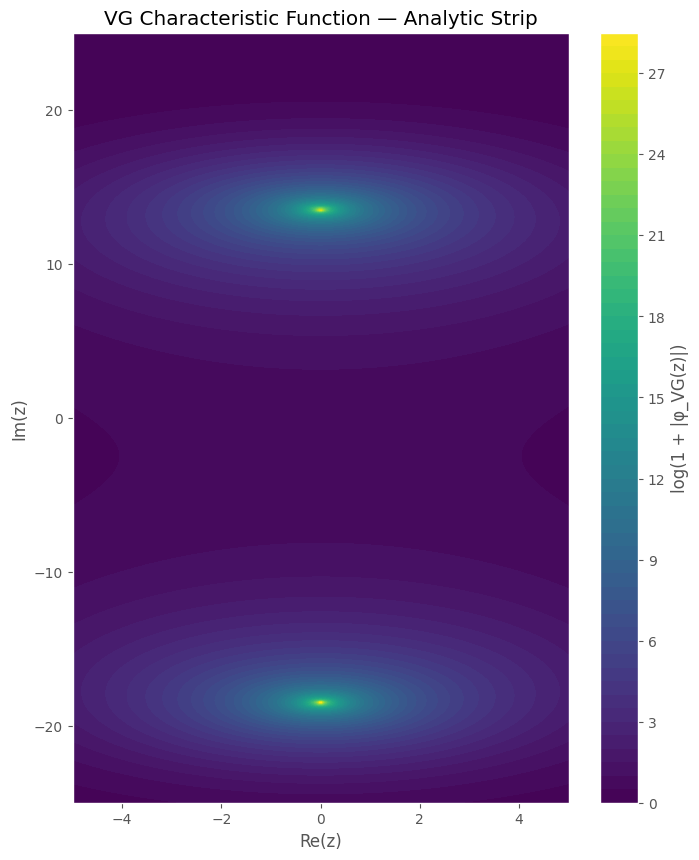

In [4]:
re_vg = np.linspace(-5, 5, 400)
im_vg = np.linspace(-25, 25, 400)
Re_vg, Im_vg = np.meshgrid(re_vg, im_vg)
Z_vg = Re_vg + 1j*Im_vg

phi_vg_val = phi_VG(Z_vg, T, sigma, nu, theta)

plt.figure(figsize=(8, 10))
plt.contourf(
    Re_vg, Im_vg,
    np.log1p(np.abs(phi_vg_val)),
    levels=60,
    cmap=cm.viridis
)
plt.colorbar(label='log(1 + |φ_VG(z)|)')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title('VG Characteristic Function — Analytic Strip')
plt.show()

### 1.2 Local Behavior Near the Real Axis

Near the real axis, the decay of the characteristic function
controls convergence of Fourier inversion integrals.

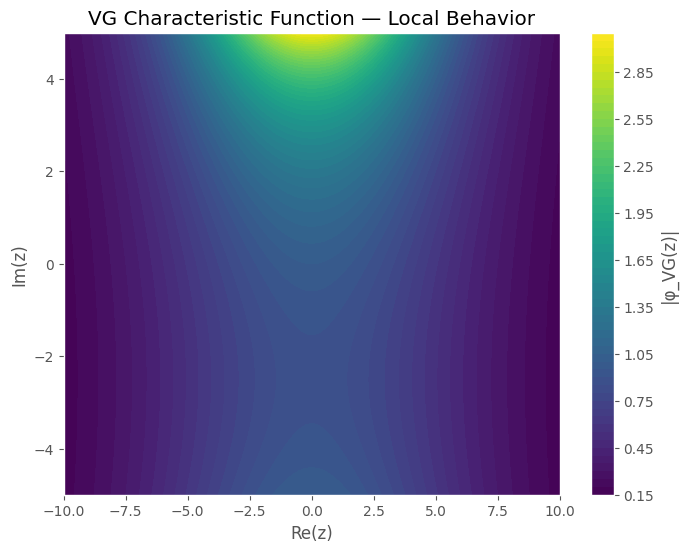

In [5]:
re_vg_local = np.linspace(-10, 10, 400)
im_vg_local = np.linspace(-5, 5, 400)
Re_l, Im_l = np.meshgrid(re_vg_local, im_vg_local)
Z_l = Re_l + 1j*Im_l

phi_vg_local = phi_VG(Z_l, T, sigma, nu, theta)

plt.figure(figsize=(8, 6))
plt.contourf(
    Re_l, Im_l,
    np.abs(phi_vg_local),
    levels=60,
    cmap=cm.viridis
)
plt.colorbar(label='|φ_VG(z)|')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title('VG Characteristic Function — Local Behavior')
plt.show()

### 1.3 Pole Structure

Poles occur where the quadratic denominator vanishes:

$$
1 - i\theta \nu z + \tfrac{1}{2}\sigma^2 \nu z^2 = 0.
$$

These poles bound the vertical strip in which the characteristic
function is analytic.

In [6]:
u = sp.symbols('u', complex=True)

poles = sp.solve(
    1 - sp.I*theta*nu*u + 0.5*sigma**2*nu*u**2,
    u
)

poles

[-18.5078105935821*I, 13.5078105935821*I]

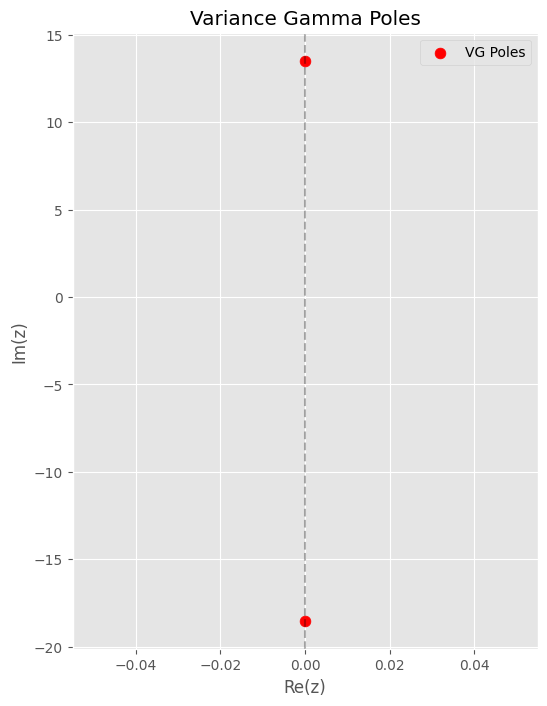

In [7]:
plt.figure(figsize=(6, 8))
plt.axvline(0, color='black', linestyle='--', alpha=0.3)
plt.scatter(
    [0, 0],
    [complex(p).imag for p in poles],
    color='red',
    s=60,
    label='VG Poles'
)
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title('Variance Gamma Poles')
plt.legend()
plt.show()

## 2. CGMY Characteristic Function

The CGMY characteristic function is

$$
\phi_{CGMY}(z) =
\exp\left(
T C \Gamma(-Y)
\left[
(M - iz)^Y - M^Y
+ (G + iz)^Y - G^Y
\right]
\right).
$$

Unlike VG, CGMY exhibits **branch points rather than isolated poles**.

In [8]:
def phi_CGMY(u, T, C, G, M, Y):
    term = (M - 1j*u)**Y - M**Y + (G + 1j*u)**Y - G**Y
    return np.exp(T * C * sp.gamma(-Y) * term)

C = 1.0
G = 5.0
M = 5.0
Y = 0.5

### 2.1 Complex-Plane Visualization

Branch points at $z = \pm iG$ and $z = \pm iM$ restrict
contour deformation in Fourier pricing integrals.

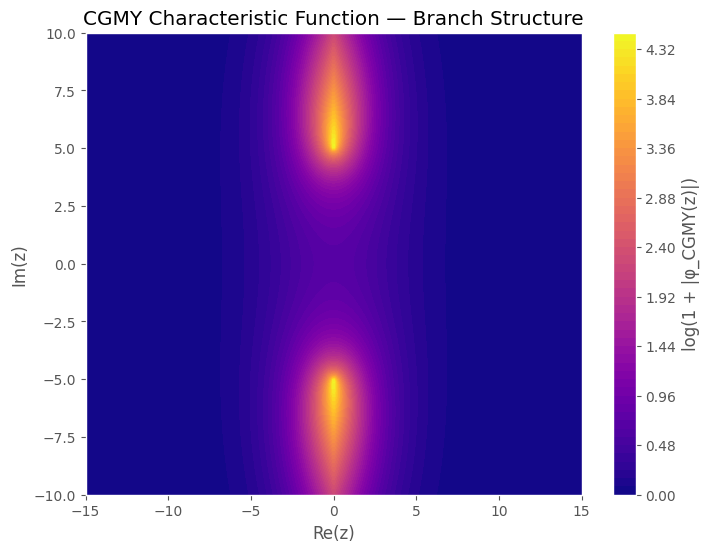

In [9]:
re_cgmy = np.linspace(-15, 15, 400)
im_cgmy = np.linspace(-10, 10, 400)
Re_c, Im_c = np.meshgrid(re_cgmy, im_cgmy)
Z_c = Re_c + 1j*Im_c

phi_cgmy_val = np.exp(
    T * float(C * sp.gamma(-Y)) *
    ((M - 1j*Z_c)**Y - M**Y + (G + 1j*Z_c)**Y - G**Y)
)

plt.figure(figsize=(8, 6))
plt.contourf(
    Re_c, Im_c,
    np.log1p(np.abs(phi_cgmy_val)),
    levels=60,
    cmap=cm.plasma
)
plt.colorbar(label='log(1 + |φ_CGMY(z)|)')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title('CGMY Characteristic Function — Branch Structure')
plt.show()

## Summary

- VG characteristic functions are meromorphic with isolated poles
  defining a clear analytic strip.
- CGMY characteristic functions exhibit branch points rather than poles.
- These analytic differences determine which contour deformation
  and residue-based pricing methods are admissible.

This notebook establishes the analytic groundwork for subsequent
Fourier pricing and contour deformation experiments.